Assalamu'alaikum.

Berikut merupakan jawaban dari tugas Implementasi ANN 

Nur Fajar 

NPM. 187006102 

Penerapan Model ANN tugas kali ini akan menggunakan dataset yang berasal dari https://archive.ics.uci.edu/ml/datasets/HCV+data

1. mendownload dan mengimport dataset tersebut ke dalam notebook ini. 

In [1]:
import pandas as pd

In [2]:
import csv
dataset = 'hcvdat0.csv'
with open(dataset) as initial_file:
  file = csv.reader(initial_file, delimiter=',')
  for row in file:
    print(row)

['', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
['1', '0=Blood Donor', '32', 'm', '38.5', '52.5', '7.7', '22.1', '7.5', '6.93', '3.23', '106', '12.1', '69']
['2', '0=Blood Donor', '32', 'm', '38.5', '70.3', '18', '24.7', '3.9', '11.17', '4.8', '74', '15.6', '76.5']
['3', '0=Blood Donor', '32', 'm', '46.9', '74.7', '36.2', '52.6', '6.1', '8.84', '5.2', '86', '33.2', '79.3']
['4', '0=Blood Donor', '32', 'm', '43.2', '52', '30.6', '22.6', '18.9', '7.33', '4.74', '80', '33.8', '75.7']
['5', '0=Blood Donor', '32', 'm', '39.2', '74.1', '32.6', '24.8', '9.6', '9.15', '4.32', '76', '29.9', '68.7']
['6', '0=Blood Donor', '32', 'm', '41.6', '43.3', '18.5', '19.7', '12.3', '9.92', '6.05', '111', '91', '74']
['7', '0=Blood Donor', '32', 'm', '46.3', '41.3', '17.5', '17.8', '8.5', '7.01', '4.79', '70', '16.9', '74.5']
['8', '0=Blood Donor', '32', 'm', '42.2', '41.9', '35.8', '31.1', '16.1', '5.82', '4.6', '109', '21.5', '67.1']
['9', '0=Blood 

In [3]:
Hepatitis = pd.read_csv("hcvdat0.csv")
Hepatitis.head(700)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
Hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


2. Melakukan data preparation

In [5]:
missing_values = ["n/a", "NA", "--"]
hcv = pd.read_csv("hcvdat0.csv", na_values = missing_values)
hcv.head(615)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [6]:
hcv.dropna(inplace=True)
hcv.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [7]:
hcv.head(615)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in hcv.columns[1:]:  
    if(hcv[c].dtype=='object'): 
        hcv[c] = encoder.fit_transform(hcv[c])
    else: # else get the self column value without encode
        hcv[c] = hcv[c]

hcv.head(700)   

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,4,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,4,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


3. Membagi dataset menjadi 3 bagian (data train, data validasi, dan data uji)

In [9]:
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

X = hcv[['Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']]
y = hcv[['Category']]


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.20)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)
print('')
print('Y_train', Y_train.shape)
print('Y_val', Y_val.shape)
print('Y_test', Y_test.shape)

X_train (424, 12)
X_val (106, 12)
X_test (59, 12)

Y_train (424, 1)
Y_val (106, 1)
Y_test (59, 1)


4. Merancang dan membangun model ANN

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [11]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi validasi training pada model ANN ini adalah sebesar', acc_val)

C:\Users\Asus TUF Gaming\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Akurasi validasi training pada model ANN ini adalah sebesar 0.9433962264150944


In [12]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing pada model ANN ini adalah sebesar', acc_test)

Akurasi Testing pada model ANN ini adalah sebesar 0.9491525423728814


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation =tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(X_train,Y_train, batch_size=1,epochs=20, validation_data=(X_val,Y_val))

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

424/424 [==============================] - 1s 3ms/step - loss: 3.1673 - accuracy: 0.8608 - val_loss: 0.6302 - val_accuracy: 0.9528
Epoch 2/20
424/424 [==============================] - 1s 2ms/step - loss: 1.1081 - accuracy: 0.9033 - val_loss: 0.6377 - val_accuracy: 0.9623
Epoch 3/20
424/424 [==============================] - 1s 2ms/step - loss: 1.0083 - accuracy: 0.9151 - val_loss: 0.2984 - val_accuracy: 0.9528
Epoch 4/20
424/424 [==============================] - 1s 2ms/step - loss: 0.5875 -

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (1, 12)                   0         
_________________________________________________________________
dense (Dense)                (1, 64)                   832       
_________________________________________________________________
dense_1 (Dense)              (1, 6)                    390       
Total params: 1,222
Trainable params: 1,222
Non-trainable params: 0
_________________________________________________________________


5. Menampilkan grafik loss train dan validasi dari hasil pembangunan model

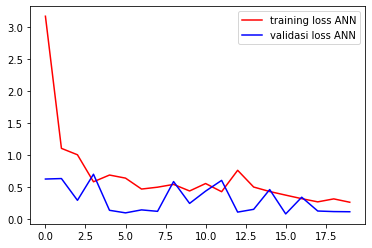

In [15]:
import matplotlib.pyplot as plt

loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

epochs = range(20)

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

6. Menampilkan hasil confusion matrix dan akurasi dari data uji.

Akurasi Testing pada model ANN ini adalah sebesar: 0.9491525423728814


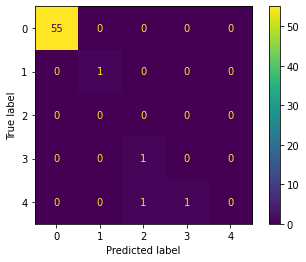

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediction = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediction)
print('Akurasi Testing pada model ANN ini adalah sebesar:', accuracy)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.95        59
   macro avg       0.40      0.40      0.40        59
weighted avg       0.95      0.95      0.95        59



C:\Users\Asus TUF Gaming\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus TUF Gaming\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus TUF Gaming\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

Demikian latihan untuk penerapan model ANN untuk tugas kali ini. 

Terima kasih banyak atas perhatiannya.

Wassalamu'alaikum.